In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

**Importing the dataset**

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/sharanarani/Data/main/Social_Network_Ads.csv')

In [3]:
df.shape

(400, 5)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
le=LabelEncoder()
df[['Gender']]=df[['Gender']].apply(le.fit_transform)

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [12]:
x=df[['Gender','Age' ,'EstimatedSalary']]
y=df['Purchased']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=7)

**Feature Scaling**

In [14]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

**Fitting K-NN to the Training set**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
#checking best k value(hyperparammeter)
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " Cross val score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10)))

K value  :  1  Cross val score :  0.8714285714285713
K value  :  2  Cross val score :  0.8714285714285713
K value  :  3  Cross val score :  0.9
K value  :  4  Cross val score :  0.9
K value  :  5  Cross val score :  0.9071428571428571
K value  :  6  Cross val score :  0.9035714285714287
K value  :  7  Cross val score :  0.9035714285714287
K value  :  8  Cross val score :  0.9
K value  :  9  Cross val score :  0.9071428571428573
K value  :  10  Cross val score :  0.9035714285714287
K value  :  20  Cross val score :  0.8607142857142858
K value  :  50  Cross val score :  0.775


In [21]:
knn.score(x_test,y_test)

0.7916666666666666

**Predicting the Test set results**

In [18]:
y_ed=knn.predict(x_test)
y_ed

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [19]:
res=pd.DataFrame({'Actual Prediction':y_test, 'Model_prediction':y_ed})
res

,Actual Prediction,Model_prediction
265,1,1
65,0,0
120,0,0
132,0,0
378,1,0
...,...,...
284,0,1
157,0,0
306,0,1
173,0,0


**Making the Confusion Matrix**

In [27]:
%matplotlib inline
import itertools

In [23]:
conf_mat=confusion_matrix(y_test, y_ed)
conf_mat

array([[79,  4],
       [21, 16]])

In [28]:
class_names = ["not_Purchased", "Purchased"]
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    name = None    
    fmt = 'd'
    thresh = cm.max() / 2
    # i and j tell us the coordinates of boxes
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0 and j == 0:
            name = "True Negatives"
        elif i == 0 and j == 1:
            name = "False Positives"
        elif i == 1 and j == 1:
            name = "True Positives"
        else:
            name = "False Negatives"
        plt.text(j, i, format(cm[i, j], fmt) + "\n" + name, horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', labelpad=12)
    plt.xlabel('Predicted label', labelpad=12)
    plt.title(title, y=1.02)
    plt.tight_layout()

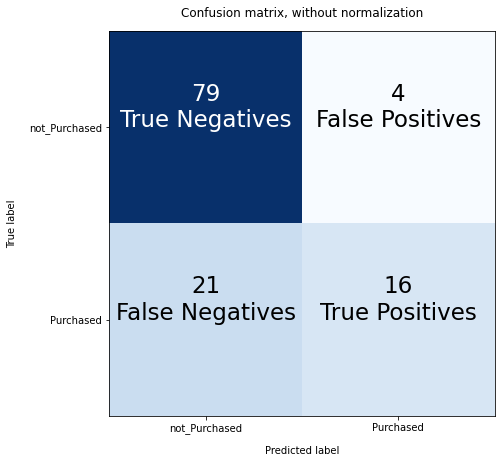

In [29]:
plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix(conf_mat, classes=class_names, title='Confusion matrix, without normalization')

In [ ]:
#since here not purhcased is 0 and purcased is 1 confution matrix has interhcanged TP, TN, FP, FN positions.